# Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data Assessing

In [37]:
flats=pd.read_csv('flats - flats.csv')
flats

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,2 BHK Flat in Krishna Colony,https://www.99acres.com/2-bhk-bedroom-apartmen...,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",C68850746
1,2 BHK Flat in Ashok Vihar,https://www.99acres.com/2-bhk-bedroom-apartmen...,Apna Enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",H68850564
2,2 BHK Flat in Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,Tulsiani Easy in Homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",J68850120
3,2 BHK Flat in Sector 61 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Smart World Orchard,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,S68849476
4,2 BHK Flat in Sector 92 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Parkwood Westend,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",L47956793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,3 BHK Flat in Sector 86 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Ansal Heights 86,1.05 Crore,"₹ 5,541/sq.ft.",Super Built up area 1895(176.05 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Servant Room,"Tower C, Sector 86 Gurgaon, Gurgaon, Haryana",9th of 13 Floors,North-East,Under Construction,"['IRIS Broadway Mall', 'Delhi Jaipur Expresswa...",Residential apartment for sell.Located in sect...,[],NaN,"['Safety4.5 out of 5', 'Lifestyle5 out of 5', ...",D26586124
3024,5 BHK Flat in Sector 48 Gurgaon,https://www.99acres.com/5-bhk-bedroom-apartmen...,Parsvnath Green Ville3.9 ★,3.3 Crore,"₹ 9,984/sq.ft.",Super Built up area 3905(362.79 sq.m.)Built Up...,5 Bedrooms,5 Bathrooms,3+ Balconies,Servant Room,"Sector 48 Gurgaon, Gurgaon, Haryana",4th of 5 Floors,NaN,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",5 bhk duplex penthouse in low rise building.Av...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...","['Management4 out of 5', 'Green Area4 out of 5...",J17123294
3025,3 BHK Flat in Sector 108 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Raheja Vedaanta3.6 ★,95 Lac,"₹ 5,214/sq.ft.",Super Built up area 1822(169.27 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Others,"Sector 108 Gurgaon, Gurgaon, Haryana",3rd

In [38]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    3028 non-null   object
 1   link             3028 non-null   object
 2   society          3027 non-null   object
 3   price            3008 non-null   object
 4   area             3015 non-null   object
 5   areaWithType     3009 non-null   object
 6   bedRoom          3009 non-null   object
 7   bathroom         3009 non-null   object
 8   balcony          3009 non-null   object
 9   additionalRoom   1695 non-null   object
 10  address          3003 non-null   object
 11  floorNum         3007 non-null   object
 12  facing           2128 non-null   object
 13  agePossession    3008 non-null   object
 14  nearbyLocations  2914 non-null   object
 15  description      3009 non-null   object
 16  furnishDetails   2204 non-null   object
 17  features         2595 non-null   

In [39]:
flats.describe()

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
count,3028,3028,3027,3008,3015,3009,3009,3009,3009,1695,3003,3007,2128,3008,2914,3009,2204,2595,2677,3009
unique,405,2881,639,440,2131,1933,7,8,6,50,1288,551,9,49,600,2788,1368,1439,342,2875
top,2 BHK Flat in Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,SS The Leaf3.8 ★,1.25 Crore,"₹ 10,000/sq.ft.",Super Built up area 1950(181.16 sq.m.)Carpet a...,3 Bedrooms,2 Bathrooms,3 Balconies,Servant Room,"Sohna, Gurgaon, Haryana",2nd of 4 Floors,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...",Best in class property available at sohna loca...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction4 out of...",I69037888
freq,126,2,73,79,19,17,1439,1047,977,630,77,74,506,1479,73,7,367,290,128,2


In [40]:
df=flats.copy()

# Data Cleaning

In [41]:
flats['price'] # has values in lac, crore and some are like price on request

0           45 Lac
1           50 Lac
2           40 Lac
3       1.47 Crore
4           70 Lac
           ...    
3023    1.05 Crore
3024     3.3 Crore
3025        95 Lac
3026     5.8 Crore
3027      11 Crore
Name: price, Length: 3028, dtype: object

In [42]:
# Price
df=df[df['price'].str.split().str[1]!='on'] # removing price on request columns as they are very few in number and we have no details

mask = df['price'].str.split().str[1] == 'Crore'
df.loc[mask, 'price'] = df.loc[mask, 'price'].str.split().str[0].astype(float) * 100
df.loc[~mask, 'price'] = df['price'].str.split().str[0]

In [43]:
flats['area']

0        ₹ 5,000/sq.ft.
1        ₹ 7,692/sq.ft.
2        ₹ 6,722/sq.ft.
3       ₹ 12,250/sq.ft.
4        ₹ 5,204/sq.ft.
             ...       
3023     ₹ 5,541/sq.ft.
3024     ₹ 9,984/sq.ft.
3025     ₹ 5,214/sq.ft.
3026    ₹ 12,500/sq.ft.
3027    ₹ 35,222/sq.ft.
Name: area, Length: 3028, dtype: object

In [44]:
# Area
df['area']=df['area'].str.split().str[1].str.split('/').str[0].str.replace(',','')
df.rename(columns={
    'area':'price_per_sqft'
},inplace=True)

In [45]:
# Bedroom, Bathroom & Balcony
df['bedRoom']=df['bedRoom'].str.split().str[0]

df['bathroom']=df['bathroom'].str.split().str[0]

df['balcony']=df['balcony'].str.split().str[0].str.replace('+','')

In [46]:
df.drop(columns=['link'],inplace=True) # dropping the links column

In [47]:
df

,property_name,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,2 BHK Flat in Krishna Colony,maa bhagwati residency,45,5000,Carpet area: 900 (83.61 sq.m.),2,2,1,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",C68850746
1,2 BHK Flat in Ashok Vihar,Apna Enclave,50,7692,Carpet area: 650 (60.39 sq.m.),2,2,1,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",H68850564
2,2 BHK Flat in Sohna,Tulsiani Easy in Homes,40,6722,Carpet area: 595 (55.28 sq.m.),2,2,3,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",J68850120
3,2 BHK Flat in Sector 61 Gurgaon,Smart World Orchard,147.0,12250,Carpet area: 1200 (111.48 sq.m.),2,2,2,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,S68849476
4,2 BHK Flat in Sector 92 Gurgaon,Parkwood Westend,70,5204,Super Built up area 1345(124.95 sq.m.),2,2,3,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",L47956793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,3 BHK Flat in Sector 86 Gurgaon,Ansal Heights 86,105.0,5541,Super Built up area 1895(176.05 sq.m.),3,3,3,Servant Room,"Tower C, Sector 86 Gurgaon, Gurgaon, Haryana",9th of 13 Floors,North-East,Under Construction,"['IRIS Broadway Mall', 'Delhi Jaipur Expresswa...",Residential apartment for sell.Located in sect...,[],NaN,"['Safety4.5 out of 5', 'Lifestyle5 out of 5', ...",D26586124
3024,5 BHK Flat in Sector 48 Gurgaon,Parsvnath Green Ville3.9 ★,330.0,9984,Super Built up area 3905(362.79 sq.m.)Built Up...,5,5,3,Servant Room,"Sector 48 Gurgaon, Gurgaon, Haryana",4th of 5 Floors,NaN,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",5 bhk duplex penthouse in low rise building.Av...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...","['Management4 out of 5', 'Green Area4 out of 5...",J17123294
3025,3 BHK Flat in Sector 108 Gurgaon,Raheja Vedaanta3.6 ★,95,5214,Super Built up area 1822(169.27 sq.m.),3,3,3,Others,"Sector 108 Gurgaon, Gurgaon, Haryana",3rd of 22 Floors,NaN,1 to 5 Year Old,NaN,3 bedroom flat with full woodwork. Ready to mo...,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Management3 out of 5', 'Green Area4 out of 5...",A41215323
3026,3 BHK Flat in DLF Phase 3,Ambience Lagoon3.9 ★,580.0,12500,Built Up area: 3700 (343.74 sq.m.),3,4,3,"Pooja Room,Study Room,Servant Room,Others","Gurgaon, DLF Phase 3, Gurgaon, Haryana",9th of 9 Floors,North-East,10+ Year Old,"['Micromax moulsari avenue metro station', 'In...",Luxury condominium complex located on delhi gu...,"['1 Water Purifier', '10 Fan', '1 Fridge', '1 ...","['Security / Fire Alarm', 'Private Garden / Te...","['Management5 out of 5', 'Green Area5 out of 5...",J18888617


In [48]:
# location
df['BHK']=df['property_name'].str.split().str[0] # No. of BHK feature

df['Location']=df['property_name'].str[13:] # new feature- Location
df.drop(columns=['property_name','address'],inplace=True)

In [49]:
df.sample(7)

,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id,BHK,Location
328,Railway Officers RPF Society,125.0,6921,Carpet area: 1806 (167.78 sq.m.),4,3,3,Servant Room,1st of 10 Floors,South-West,10+ Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Esic...",4bhk flat/apartment for sale in rpf housing so...,"['3 Wardrobe', '1 Exhaust Fan', '3 Geyser', '1...","['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Lifestyle4 out of 5...",G69748500,4,Sector 9A Gurgaon
1221,Krrish Provence Estate,550.0,9482,Super Built up area 5800(538.84 sq.m.),4,5,3,"Pooja Room,Study Room,Servant Room",11st of 26 Floors,East,0 to 1 Year Old,"['Tniy Toons School', 'Pathways School Gurgoan...",These units are a perfect combination of comfo...,NaN,"['Water purifier', 'Security / Fire Alarm', 'P...",NaN,S69942394,4,Gwal Pahari
1759,Tulip Leaf,206.0,11386,Super Built up area 1812(168.34 sq.m.),3,3,3,NaN,16th of 20 Floors,South-West,1 to 5 Year Old,"['Omaxe City Centre Sector 49', 'Southern Peri...","Situated in sector 69 gurgaon, tulip leaf is a...","['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Lifestyle4 out of 5...",B69392810,3,Sector 69 Gurgaon
2743,ILD Greens4.1 ★,75,5245,Built Up area: 1430 (132.85 sq.m.),2,2,3,NaN,13rd of 14 Floors,East,undefined,"['The Esplanade Mall', 'Gurgaon Road', 'Delhi ...",2bhk multistorey apartment for new property in...,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Management4.5 out of 5', 'Green Area5 out of...",A68021584,2,Sector 37C Gurgaon
2217,DLF The Arbour,780.0,19747,Built Up area: 3950 (366.97 sq.m.),4,4,No,NaN,6th of 6 Floors,NaN,undefined,"['Radhakrishna Shani Mandir', 'pracksht hospit...",Multistorey apartment is available for sale. I...,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,Q69739946,4,Sector 63 Gurgaon
1940,TARC Maceo3.8 ★,180.0,7758,Carpet area: 2320 (215.54 sq.m.),4,3,3,"Pooja Room,Study Room",Ground of 13 Floors,North,1 to 5 Year Old,"['Manish Gallexie 91', 'Dwarka Expressway', 'R...",Fully furnished property for sale,"['1 Water Purifier', '7 Fan', '1 Dining Table'...","['Intercom Facility', 'Lift(s)', 'Maintenance ...","['Green Area5 out of 5', 'Construction4 out of...",Q70100554,4,Sector 91 Gurgaon
2054,Imperia The Esfera,90,6272,Built Up area: 1435 (133.32 sq.m.)Carpet area:...,3,3,3,NaN,9th of 9 Floors,East,undefined,"['Approved Sector 37 Mero Station', 'Esplanade...",Multistorey apartment located on 9th floor pro...,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,"['Environment5 out of 5', 'Lifestyle4 out of 5...",D69988498,3,Sector 37C Gurgaon


In [50]:
# Floor Num
df['Total Floors']=df['floorNum'].str.split().str[-2] # new feature 

df['floorNum']=df['floorNum'].str.split().str[0].str.replace('th','').str.replace('nd','').str.replace('st','').str.replace('rd','').str.replace(r'\D+', '0', regex=True)

In [51]:
df

,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id,BHK,Location,Total Floors
0,maa bhagwati residency,45,5000,Carpet area: 900 (83.61 sq.m.),2,2,1,NaN,4,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",C68850746,2,Krishna Colony,4
1,Apna Enclave,50,7692,Carpet area: 650 (60.39 sq.m.),2,2,1,NaN,1,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",H68850564,2,Ashok Vihar,3
2,Tulsiani Easy in Homes,40,6722,Carpet area: 595 (55.28 sq.m.),2,2,3,NaN,12,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",J68850120,2,Sohna,14
3,Smart World Orchard,147.0,12250,Carpet area: 1200 (111.48 sq.m.),2,2,2,Study Room,2,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,S68849476,2,Sector 61 Gurgaon,4
4,Parkwood Westend,70,5204,Super Built up area 1345(124.95 sq.m.),2,2,3,Study Room,5,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",L47956793,2,Sector 92 Gurgaon,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,Ansal Heights 86,105.0,5541,Super Built up area 1895(176.05 sq.m.),3,3,3,Servant Room,9,North-East,Under Construction,"['IRIS Broadway Mall', 'Delhi Jaipur Expresswa...",Residential apartment for sell.Located in sect...,[],NaN,"['Safety4.5 out of 5', 'Lifestyle5 out of 5', ...",D26586124,3,Sector 86 Gurgaon,13
3024,Parsvnath Green Ville3.9 ★,330.0,9984,Super Built up area 3905(362.79 sq.m.)Built Up...,5,5,3,Servant Room,4,NaN,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",5 bhk duplex penthouse in low rise building.Av...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...","['Management4 out of 5', 'Green Area4 out of 5...",J17123294,5,Sector 48 Gurgaon,5
3025,Raheja Vedaanta3.6 ★,95,5214,Super Built up area 1822(169.27 sq.m.),3,3,3,Others,3,NaN,1 to 5 Year Old,NaN,3 bedroom flat with full woodwork. Ready to mo...,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Management3 out of 5', 'Green Area4 out of 5...",A41215323,3,Sector 108 Gurgaon,22
3026,Ambience Lagoon3.9 ★,580.0,12500,Built Up area: 3700 (343.74 sq.m.),3,4,3,"Pooja Room,Study Room,Servant Room,Others",9,North-East,10+ Year Old,"['Micromax moulsari avenue metro station', 'In...",Luxury condominium complex located on delhi gu...,"['1 Water Purifier', '10 Fan', '1 Fridge', '1 ...","['Security / Fire Alarm', 'Private Garden / Te...","['Management5 out of 5', 'Green Area5 out of 5...",J18888617,3,DLF Phase 3,9


In [52]:
flats['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1479
0 to 1 Year Old        443
5 to 10 Year Old       361
undefined              222
10+ Year Old           137
Under Construction      92
Within 6 months         63
Within 3 months         25
Dec 2023                20
By 2023                 19
By 2024                 16
Dec 2024                15
Mar 2024                14
Aug 2023                 7
Oct 2024                 7
Dec 2025                 7
Jan 2024                 7
Nov 2023                 5
Jun 2024                 5
Aug 2024                 5
By 2025                  4
Sep 2023                 4
Jan 2025                 4
Jul 2024                 4
Oct 2023                 3
Feb 2024                 3
Nov 2024                 3
May 2024                 3
Aug 2025                 2
Jan 2026                 2
Mar 2025                 2
Jun 2027                 2
Jul 2025                 2
Oct 2025                 2
Jul 2027                 2
Apr 2026                 2
Dec 2026      

In [53]:
# Age posession-
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [54]:
df

,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id,BHK,Location,Total Floors
0,maa bhagwati residency,45,5000,Carpet area: 900 (83.61 sq.m.),2,2,1,NaN,4,West,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",C68850746,2,Krishna Colony,4
1,Apna Enclave,50,7692,Carpet area: 650 (60.39 sq.m.),2,2,1,NaN,1,West,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",H68850564,2,Ashok Vihar,3
2,Tulsiani Easy in Homes,40,6722,Carpet area: 595 (55.28 sq.m.),2,2,3,NaN,12,NaN,New Property,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",J68850120,2,Sohna,14
3,Smart World Orchard,147.0,12250,Carpet area: 1200 (111.48 sq.m.),2,2,2,Study Room,2,NaN,Under Construction,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,S68849476,2,Sector 61 Gurgaon,4
4,Parkwood Westend,70,5204,Super Built up area 1345(124.95 sq.m.),2,2,3,Study Room,5,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",L47956793,2,Sector 92 Gurgaon,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,Ansal Heights 86,105.0,5541,Super Built up area 1895(176.05 sq.m.),3,3,3,Servant Room,9,North-East,Under Construction,"['IRIS Broadway Mall', 'Delhi Jaipur Expresswa...",Residential apartment for sell.Located in sect...,[],NaN,"['Safety4.5 out of 5', 'Lifestyle5 out of 5', ...",D26586124,3,Sector 86 Gurgaon,13
3024,Parsvnath Green Ville3.9 ★,330.0,9984,Super Built up area 3905(362.79 sq.m.)Built Up...,5,5,3,Servant Room,4,NaN,Old Property,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",5 bhk duplex penthouse in low rise building.Av...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...","['Management4 out of 5', 'Green Area4 out of 5...",J17123294,5,Sector 48 Gurgaon,5
3025,Raheja Vedaanta3.6 ★,95,5214,Super Built up area 1822(169.27 sq.m.),3,3,3,Others,3,NaN,Relatively New,NaN,3 bedroom flat with full woodwork. Ready to mo...,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Management3 out of 5', 'Green Area4 out of 5...",A41215323,3,Sector 108 Gurgaon,22
3026,Ambience Lagoon3.9 ★,580.0,12500,Built Up area: 3700 (343.74 sq.m.),3,4,3,"Pooja Room,Study Room,Servant Room,Others",9,North-East,Old Property,"['Micromax moulsari avenue metro station', 'In...",Luxury condominium complex located on delhi gu...,"['1 Water Purifier', '10 Fan', '1 Fridge', '1 ...","['Security / Fire Alarm', 'Private Garden / Te...","['Management5 out of 5', 'Green Area5 out of 5...",J18888617,3,DLF Phase 3,9


In [55]:
# Additional Room
df['Servant_Room'] = df['additionalRoom'].apply(lambda x: 1 if pd.notnull(x) and 'Servant Room' in x else 0)
df['Study_Room'] = df['additionalRoom'].apply(lambda x: 1 if pd.notnull(x) and 'Study Room' in x else 0)
df['Pooja_Room'] = df['additionalRoom'].apply(lambda x: 1 if pd.notnull(x) and 'Pooja Room' in x else 0)
df['Store_Room'] = df['additionalRoom'].apply(lambda x: 1 if pd.notnull(x) and 'Store Room' in x else 0)

df.drop(columns=['additionalRoom','property_id'],inplace=True)

In [56]:
df

,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,...,furnishDetails,features,rating,BHK,Location,Total Floors,Servant_Room,Study_Room,Pooja_Room,Store_Room
0,maa bhagwati residency,45,5000,Carpet area: 900 (83.61 sq.m.),2,2,1,4,West,Relatively New,...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",2,Krishna Colony,4,0,0,0,0
1,Apna Enclave,50,7692,Carpet area: 650 (60.39 sq.m.),2,2,1,1,West,Old Property,...,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",2,Ashok Vihar,3,0,0,0,0
2,Tulsiani Easy in Homes,40,6722,Carpet area: 595 (55.28 sq.m.),2,2,3,12,NaN,New Property,...,NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",2,Sohna,14,0,0,0,0
3,Smart World Orchard,147.0,12250,Carpet area: 1200 (111.48 sq.m.),2,2,2,2,NaN,Under Construction,...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,2,Sector 61 Gurgaon,4,0,1,0,0
4,Parkwood Westend,70,5204,Super Built up area 1345(124.95 sq.m.),2,2,3,5,NaN,Under Construction,...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",2,Sector 92 Gurgaon,8,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,Ansal Heights 86,105.0,5541,Super Built up area 1895(176.05 sq.m.),3,3,3,9,North-East,Under Construction,...,[],NaN,"['Safety4.5 out of 5', 'Lifestyle5 out of 5', ...",3,Sector 86 Gurgaon,13,1,0,0,0
3024,Parsvnath Green Ville3.9 ★,330.0,9984,Super Built up area 3905(362.79 sq.m.)Built Up...,5,5,3,4,NaN,Old Property,...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...","['Management4 out of 5', 'Green Area4 out of 5...",5,Sector 48 Gurgaon,5,1,0,0,0
3025,Raheja Vedaanta3.6 ★,95,5214,Super Built up area 1822(169.27 sq.m.),3,3,3,3,NaN,Relatively New,...,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Management3 out of 5', 'Green Area4 out of 5...",3,Sector 108 Gurgaon,22,0,0,0,0
3026,Ambience Lagoon3.9 ★,580.0,12500,Built Up area: 3700 (343.74 sq.m.),3,4,3,9,North-East,Old Property,...,"['1 Water Purifier', '10 Fan', '1 Fridge', '1 ...","['Security / Fire Alarm', 'Private Garden / Te...","['Management5 out of 5', 'Green Area5 out of 5...",3,DLF Phase 3,9,1,1,1,0


In [57]:
# Rating- on an average its 4 for most of the columns, dropping this feature
df.drop(columns='rating',inplace=True)

In [58]:
df.columns

Index(['society', 'price', 'price_per_sqft', 'areaWithType', 'bedRoom',
       'bathroom', 'balcony', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'description', 'furnishDetails', 'features', 'BHK',
       'Location', 'Total Floors', 'Servant_Room', 'Study_Room', 'Pooja_Room',
       'Store_Room'],
      dtype='object')

* Carpet area refers to the actual usable area within an apartment or building, excluding the thickness of the inner walls. It is the area that can be covered by a carpet or rug.
* Built-up area includes the carpet area plus the area covered by the walls of the apartment.
* Super built-up area is the sum of the built-up area plus a proportionate share of common areas such as the lobby, staircase, elevator, etc.

Calculated area is different for different types of area, not generalized

In [59]:
import re
carpet = r'Carpet area: (\d+(\.\d+)?)'# + is for one or more character, inside bracket expression is for decimal values(optional, indicated by ?)
built = r'Built Up area: (\d+(\.\d+)?)'
super_built = r'Super Built up area (\d+(\.\d+)?)'

In [60]:
carpet_area = []
for i in df['areaWithType']:
    if isinstance(i, str):
        match = re.search(carpet, i)
        if match:
            carpet_area.append(match.group(1))
        else:
            carpet_area.append(np.nan)
    else:
        carpet_area.append(np.nan)

In [61]:
builtup_area = []
for i in df['areaWithType']:
    if isinstance(i, str):
        match = re.search(built, i)
        if match:
            builtup_area.append(match.group(1))
        else:
            builtup_area.append(np.nan)
    else:
        builtup_area.append(np.nan)

In [62]:
superbuilt = []
for i in df['areaWithType']:
    if isinstance(i, str):
        match = re.search(super_built, i)
        if match:
            superbuilt.append(match.group(1))
        else:
            superbuilt.append(np.nan)
    else:
        superbuilt.append(np.nan)

In [63]:
df['Carpet_Area']=carpet_area
df['Built_Up_Area']=builtup_area
df['Super_BuiltUp_Area']=superbuilt
df.drop(columns='areaWithType',inplace=True)

In [64]:
df

,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,nearbyLocations,...,BHK,Location,Total Floors,Servant_Room,Study_Room,Pooja_Room,Store_Room,Carpet_Area,Built_Up_Area,Super_BuiltUp_Area
0,maa bhagwati residency,45,5000,2,2,1,4,West,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",...,2,Krishna Colony,4,0,0,0,0,900,NaN,NaN
1,Apna Enclave,50,7692,2,2,1,1,West,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...",...,2,Ashok Vihar,3,0,0,0,0,650,NaN,NaN
2,Tulsiani Easy in Homes,40,6722,2,2,3,12,NaN,New Property,"['Huda City Metro', 'Golf Course extn road', '...",...,2,Sohna,14,0,0,0,0,595,NaN,NaN
3,Smart World Orchard,147.0,12250,2,2,2,2,NaN,Under Construction,"['Sector 55-56 Metro station', 'Bestech Centra...",...,2,Sector 61 Gurgaon,4,0,1,0,0,1200,NaN,NaN
4,Parkwood Westend,70,5204,2,2,3,5,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",...,2,Sector 92 Gurgaon,8,0,1,0,0,NaN,NaN,1345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,Ansal Heights 86,105.0,5541,3,3,3,9,North-East,Under Construction,"['IRIS Broadway Mall', 'Delhi Jaipur Expresswa...",...,3,Sector 86 Gurgaon,13,1,0,0,0,NaN,NaN,1895
3024,Parsvnath Green Ville3.9 ★,330.0,9984,5,5,3,4,NaN,Old Property,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",...,5,Sector 48 Gurgaon,5,1,0,0,0,NaN,3305,3905
3025,Raheja Vedaanta3.6 ★,95,5214,3,3,3,3,NaN,Relatively New,NaN,...,3,Sector 108 Gurgaon,22,0,0,0,0,NaN,NaN,1822
3026,Ambience Lagoon3.9 ★,580.0,12500,3,4,3,9,North-East,Old Property,"['Micromax moulsari avenue metro station', 'In...",...,3,DLF Phase 3,9,1,1,1,0,NaN,3700,NaN


In [65]:
df['society']=df['society'].replace(r'\d+(\.\d\s[★])?','',regex=True)

In [66]:
# excel mai load and check ajeeb data
# think imputation techniques

Features (Relevant)--

* Vaastu
* Security/Fire Alarm
* Lift
* Visitor Parking
* Water Storage
* Maintenance Staff
* Swimmimg Pool
* Community Center/Club House
* Garden/Park
* Wifi Connectivity
* Power-backup
* Intercom facility
* Centrally Air Conditioned
* Shopping Centre
* Waste Disposal
* Piped Gas
* Gym

In [67]:
feature_scores = {
    'Vaastu': 5, 
    'Security/Fire Alarm': 8, 
    'Lift': 8, 
    'Visitor Parking': 7, 
    'Water Storage': 6, 
    'Maintenance Staff': 7, 
    'Swimming Pool': 9, 
    'Community Center/Club House': 8, 
    'Garden/Park': 7, 
    'Wifi Connectivity': 6, 
    'Power-backup': 8, 
    'Intercom Facility': 8, 
    'Centrally Air Conditioned': 9, 
    'Shopping Centre': 10, 
    'Waste Disposal': 6, 
    'Piped Gas': 8, 
    'GYM': 8

}

In [68]:
features = {
    'piped_gas': 'Piped-gas',
    'waste_disposal': 'Waste Disposal',
    'shopping_centre': 'Shopping Centre',
    'intercom': 'Intercom Facility',
    'power_backup': 'Power Back-up',
    'central_ac': 'Centrally Air Conditioned',
    'wifi': 'Internet/wi-fi connectivity',
    'garden': ['Private Garden / Terrace', 'Park'],
    'community': 'Club house / Community Center',
    'staff': 'Maintenance Staff',
    'water_storage': 'Water Storage',
    'visitor_parking': 'Visitor Parking',
    'lift': 'Lift(s)',
    'vaastu': 'Feng Shui / Vaastu Compliant',
    'security': ['Security Personnel', 'Security / Fire Alarm'],
    'swimming': 'Swimming Pool',
    'gym': 'Fitness Centre / GYM'
}

def create_feature(X, keyword):
    if pd.notnull(X):
        if isinstance(keyword, list):
            for k in keyword:
                if k in X:
                    return 1
            return 0
        else:
            return 1 if keyword in X else 0
    else:
        return np.nan

for feature, keyword in features.items():
    df[feature] = df['features'].apply(lambda x: create_feature(x, keyword))

In [69]:
def calculate_luxury_score(features):
    total_score = 0
    if pd.notnull(features):
        features_list = eval(features) 
        for feature in features_list:
            if feature in feature_scores:
                total_score += feature_scores[feature]
    return total_score

df['luxury_score'] = df['features'].apply(calculate_luxury_score)

Nearby Locations: (Mainly)

* Hospital/Clinic/Nursing Home/Medical Centre
* Mall
* Mandir/Church
* ATM
* Bank
* School
* College/University
* Metro Station
* Airport 
* Hotel/Restaurant/Food Court

In [70]:
categories_keywords = {
    'Hospital': ['hospital', 'clinic', 'nursing home', 'medical centre'],
    'Mall': ['mall'],
    'Mandir/Church': ['mandir', 'church'],
    'ATM': ['atm'],
    'Bank': ['bank'],
    'School': ['school'],
    'College': ['college', 'university'],
    'Metro Station': ['metro station'],
    'Airport': ['airport'],
    'Hotel': ['hotel', 'restaurant', 'food court']
}

def create_category_column(x, keywords):
    if pd.notnull(x):
        for keyword in keywords:
            if keyword in str(x).lower():
                return 1
        return 0
    else:
        return np.nan
for category, keywords in categories_keywords.items():
    df[category] = df['nearbyLocations'].apply(create_category_column, keywords=keywords)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2164\3860074040.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'], inplace=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Scaled data sample: [[-0.20263959 -0.64162727 -0.25636866  0.01920217 -0.16605663 -0.66702577
  -0.56818461 -0.18515344 -0.36751049 -0.14215397 -0.23672347 -0.01821353
  -0.22793109  0.          0.          0.          0.          0.        ]
 [-0.20263959  1.49264998  0.78463303 -0.12635801 -0.16605663  1.49919246
   0.12582874 -0.18515344 -0.36751049 -0.14215397 -0.23672347  1.21662267
  -0.22793109  0.          0.          0.          0.          0.        ]
 [-0.20263959 -0.64162727 -0.25636866 -0.56303854 -0.16605663 -0.66702577
  -0.56818461 -0.18515344 -0.36751049 -0.14215397 -0.23672347 -0.63563162
  -0.22793109  0.          0.          0.          0.          0.        ]
 [-0.20263959 -0.64162727 -0.25636866 -0.56303854 -0.16605663 -0.66702577
  -0.56818461 -0.18515344 -0.36751049 -0.14215397 -0.23672347 -0.63563162
  -0.22793109  0.          0.          0.          0.          0.        ]
 [-0.20263959 -0.64162727 -0.25636866 -0.56303854 -0.16605663 -0.66702577
  -0.56818461 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

WCSS values: [39221.00000000025, 28531.747903767067, 21807.30295753196, 19502.94169529469, 18120.695920566704, 16690.597420241393, 15453.071301901695, 14732.068855303638, 13741.064630936642, 13352.13931248898]


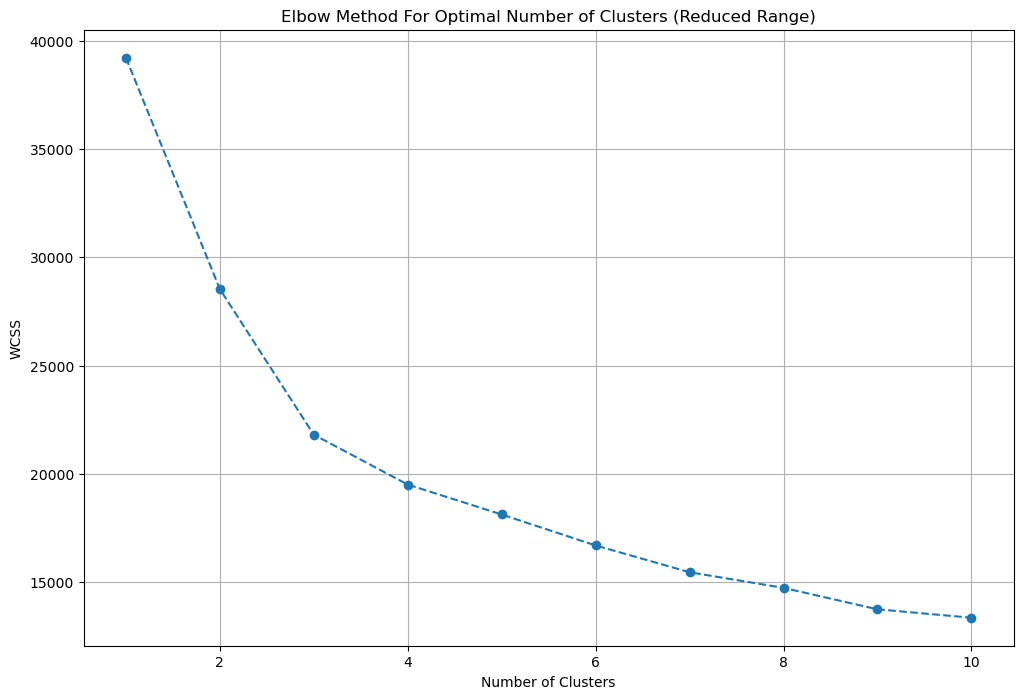

In [71]:
# furnish details
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]

for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

furnishings_df = df[['furnishDetails'] + columns_to_include]
furnishings_df.drop(columns=['furnishDetails'], inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

wcss_reduced = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [72]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

cluster_assignments = kmeans.predict(scaled_data)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [73]:
df['furnishing_type'] = cluster_assignments

In [77]:
df.drop(columns=['nearbyLocations','furnishDetails','features','description'],inplace=True)

#### Cleaning by going through data in excel

In [42]:
df['society']=df['society'].str.replace('ss','SS The Leaf')

In [43]:
df.loc[1526, 'Location'] = 'Sector 83 Gurgaon'

In [44]:
df.drop([2767,2156],inplace=True) # missing

In [45]:
df.columns

Index(['society', 'price', 'price_per_sqft', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'agePossession', 'BHK', 'Location',
       'Total Floors', 'Servant_Room', 'Study_Room', 'Pooja_Room',
       'Store_Room', 'Carpet_Area', 'Built_Up_Area', 'Super_BuiltUp_Area',
       'piped_gas', 'waste_disposal', 'shopping_centre', 'intercom',
       'power_backup', 'central_ac', 'wifi', 'garden', 'community', 'staff',
       'water_storage', 'visitor_parking', 'lift', 'vaastu', 'security',
       'swimming', 'gym', 'luxury_score', 'Hospital', 'Mall', 'Mandir/Church',
       'ATM', 'Bank', 'School', 'College', 'Metro Station', 'Airport', 'Hotel',
       'Exhaust Fan', 'Fridge', 'Stove', 'Sofa', 'Wardrobe', 'Chimney',
       'Curtains', 'Modular Kitchen', 'Dining Table', 'Bed', 'Geyser', 'Fan',
       'Water Purifier', 'AC', 'Light', 'TV', 'Microwave', 'Washing Machine',
       'furnishing_type'],
      dtype='object')

In [46]:
df.loc[286]

society             society
price                 price
price_per_sqft          NaN
bedRoom             bedRoom
bathroom           bathroom
                     ...   
Light                     0
TV                        0
Microwave                 0
Washing Machine           0
furnishing_type           0
Name: 286, Length: 66, dtype: object

In [47]:
df.drop(286,inplace=True)

In [48]:
df.loc[1309] # strange price per sqft

society            Ramsons Kshitij
price                           31
price_per_sqft                   5
bedRoom                          2
bathroom                         2
                        ...       
Light                            0
TV                               0
Microwave                        0
Washing Machine                  0
furnishing_type                  0
Name: 1309, Length: 66, dtype: object

In [49]:
df[df['balcony'].notna() & df['balcony'].str.contains('No')]

,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,BHK,...,Bed,Geyser,Fan,Water Purifier,AC,Light,TV,Microwave,Washing Machine,furnishing_type
16,Senate Court,90,14084,1,1,No,0,NaN,Undefined,1,...,0,0,0,0,0,0,0,0,0,0
30,Godrej Habitat,135.0,12784,2,2,No,4,North-East,Undefined,2,...,0,0,0,0,0,1,0,0,0,0
81,MM Soulitude,125.0,8784,3,3,No,4,NaN,Undefined,3,...,0,0,0,0,0,0,0,0,0,0
93,Signature Global Park,90,8036,3,2,No,2,NaN,Under Construction,3,...,0,0,0,0,0,0,0,0,0,0
94,Godrej Nature Plus,175.0,8768,3,3,No,2,NaN,Undefined,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,Greenopolis,89.77,4700,3,3,No,14,NaN,Under Construction,3,...,0,0,0,0,0,0,0,0,0,0
2949,Aditya Apartment,100.0,4033,3,4,No,3,NaN,New Property,3,...,0,0,0,0,0,0,0,0,0,0
2953,LIG Flat,150.0,50000,1,1,No,0,NaN,Undefined,1,...,0,0,0,0,0,1,0,0,0,0
2955,Raheja Vedaanta,125.0,5681,3,2,No,0,NaN,Relatively New,3,...,0,1,1,0,3,1,0,0,0,1


In [50]:
mask = df['balcony'].notna() & df['balcony'].str.contains('No')
df.loc[mask, 'balcony'] = 0

In [51]:
df.drop(2137,inplace=True)

# Exploratory Data Analysis

In [84]:
df

,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,BHK,...,TV,Microwave,Wardrobe,Fridge,AC,Modular Kitchen,Fan,Washing Machine,Water Purifier,furnishing_type
0,maa bhagwati residency,45,5000,2,2,1,4,West,Relatively New,2,...,0,0,1,0,0,0,0,0,0,0
1,Apna Enclave,50,7692,2,2,1,1,West,Old Property,2,...,0,0,3,0,0,0,0,0,0,2
2,Tulsiani Easy in Homes,40,6722,2,2,3,12,NaN,New Property,2,...,0,0,0,0,0,0,0,0,0,0
3,Smart World Orchard,147.0,12250,2,2,2,2,NaN,Under Construction,2,...,0,0,0,0,0,0,0,0,0,0
4,Parkwood Westend,70,5204,2,2,3,5,NaN,Under Construction,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,Ansal Heights,105.0,5541,3,3,3,9,North-East,Under Construction,3,...,0,0,0,0,0,0,0,0,0,0
3024,Parsvnath Green Ville,330.0,9984,5,5,3,4,NaN,Old Property,5,...,0,0,0,0,0,0,0,0,0,0
3025,Raheja Vedaanta,95,5214,3,3,3,3,NaN,Relatively New,3,...,0,0,0,0,0,0,0,0,0,0
3026,Ambience Lagoon,580.0,12500,3,4,3,9,North-East,Old Property,3,...,0,0,4,1,0,0,0,0,0,2


In [82]:
df.describe()

,Servant_Room,Study_Room,Pooja_Room,Store_Room,piped_gas,waste_disposal,shopping_centre,intercom,power_backup,central_ac,...,TV,Microwave,Wardrobe,Fridge,AC,Modular Kitchen,Fan,Washing Machine,Water Purifier,furnishing_type
count,3017.000000,3017.000000,3017.000000,3017.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,...,3017.000000,3017.000000,3017.000000,3017.000000,3017.0,3017.0,3017.0,3017.0,3017.0,3017.000000
mean,0.331455,0.159430,0.119987,0.052370,0.372829,0.412968,0.554226,0.794288,0.283674,0.185257,...,0.040106,0.054359,1.029500,0.049387,0.0,0.0,0.0,0.0,0.0,0.555187
std,0.470814,0.366137,0.325000,0.222809,0.483651,0.492462,0.497147,0.404299,0.450868,0.388581,...,0.282178,0.229667,1.619917,0.216710,0.0,0.0,0.0,0.0,0.0,0.875745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,2.000000,13.000000,1.000000,0.0,0.0,0.0,0.0,0.0,2.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3017 entries, 0 to 3027
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   society             3016 non-null   object 
 1   price               2997 non-null   object 
 2   price_per_sqft      3014 non-null   object 
 3   bedRoom             2998 non-null   object 
 4   bathroom            2998 non-null   object 
 5   balcony             2998 non-null   object 
 6   floorNum            2996 non-null   object 
 7   facing              2124 non-null   object 
 8   agePossession       3017 non-null   object 
 9   BHK                 3017 non-null   object 
 10  Location            3017 non-null   object 
 11  Total Floors        2995 non-null   object 
 12  Servant_Room        3017 non-null   int64  
 13  Study_Room          3017 non-null   int64  
 14  Pooja_Room          3017 non-null   int64  
 15  Store_Room          3017 non-null   int64  
 16  Carpet_Area

In [87]:
def convert(x):
    df[x] = pd.to_numeric(df[x], errors='coerce')
convert('price')
convert('price_per_sqft')
convert('bedRoom')
convert('bathroom')
convert('balcony')
convert('floorNum')
convert('BHK')
convert('Total Floors')
convert('Carpet_Area')
convert('Built_Up_Area')
convert('Super_BuiltUp_Area')

In [89]:
df.columns

Index(['society', 'price', 'price_per_sqft', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'facing', 'agePossession', 'BHK', 'Location',
       'Total Floors', 'Servant_Room', 'Study_Room', 'Pooja_Room',
       'Store_Room', 'Carpet_Area', 'Built_Up_Area', 'Super_BuiltUp_Area',
       'piped_gas', 'waste_disposal', 'shopping_centre', 'intercom',
       'power_backup', 'central_ac', 'wifi', 'garden', 'community', 'staff',
       'water_storage', 'visitor_parking', 'lift', 'vaastu', 'security',
       'swimming', 'gym', 'luxury_score', 'Hospital', 'Mall', 'Mandir/Church',
       'ATM', 'Bank', 'School', 'College', 'Metro Station', 'Airport', 'Hotel',
       'Sofa', 'Chimney', 'Curtains', 'Light', 'Bed', 'Exhaust Fan', 'Geyser',
       'Dining Table', 'Stove', 'TV', 'Microwave', 'Wardrobe', 'Fridge', 'AC',
       'Modular Kitchen', 'Fan', 'Washing Machine', 'Water Purifier',
       'furnishing_type'],
      dtype='object')

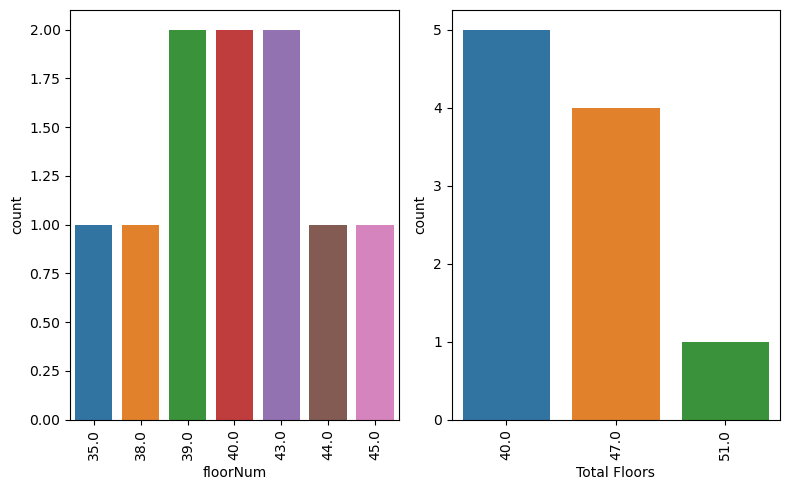

In [90]:
floor=df.sort_values(['floorNum','Total Floors'],ascending=False).head(10)
fig,axes=plt.subplots(1,2,figsize=(8,5))
sns.countplot(floor,x='floorNum',ax=axes[0])
sns.countplot(floor,x='Total Floors',ax=axes[1])
for ax in axes:
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.6325476935012844


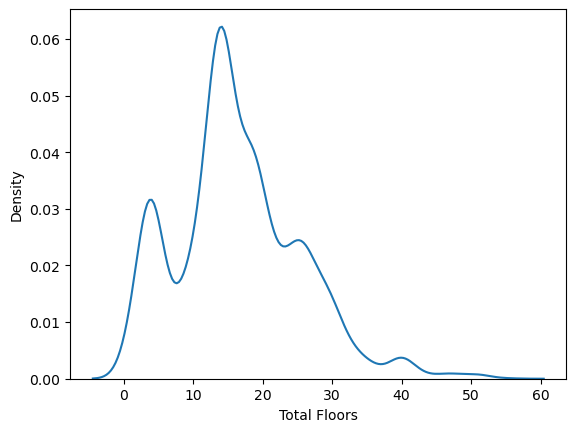

In [91]:
sns.kdeplot(df,x='Total Floors')
print(df['Total Floors'].skew())

* Most of the flats have less than 50 floors

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'West'),
  Text(1, 0, 'North-East'),
  Text(2, 0, 'South-East'),
  Text(3, 0, 'East'),
  Text(4, 0, 'North'),
  Text(5, 0, 'South-West'),
  Text(6, 0, 'North-West'),
  Text(7, 0, 'South'),
  Text(8, 0, 'facing')])

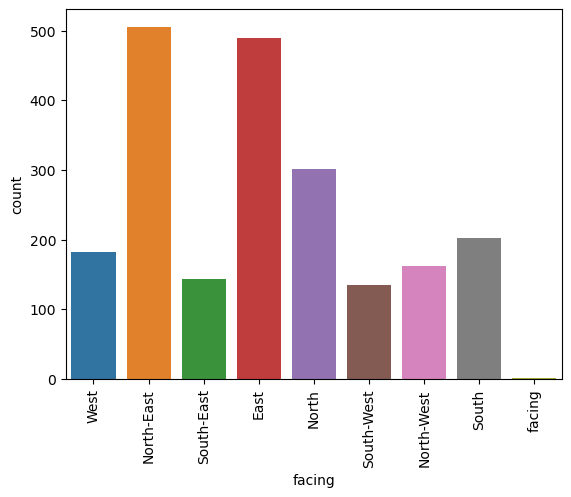

In [92]:
# facing
sns.countplot(df,x='facing')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Relatively New'),
  Text(1, 0, 'Old Property'),
  Text(2, 0, 'New Property'),
  Text(3, 0, 'Under Construction'),
  Text(4, 0, 'Undefined'),
  Text(5, 0, 'Moderately Old')])

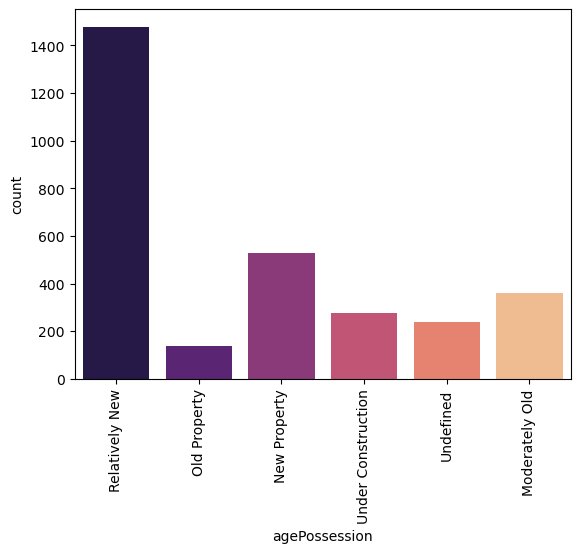

In [93]:
# agePossession
sns.countplot(df,x='agePossession',palette='magma')
plt.xticks(rotation=90)

* Most of the Flats are new properties

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BHK', ylabel='Density'>

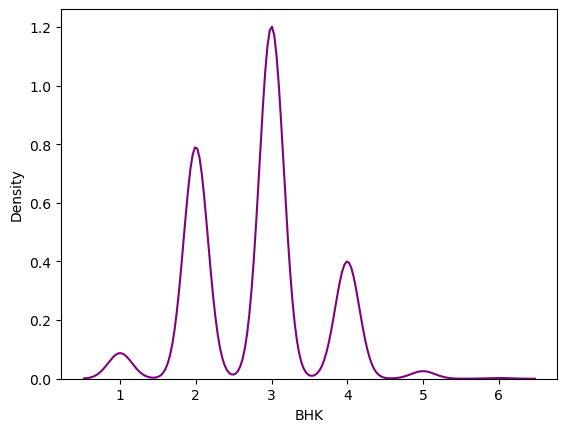

In [117]:
sns.kdeplot(df,x='BHK',color='purple')

* Most of the flats are 2-4 BHK

<Axes: xlabel='furnishing_type', ylabel='count'>

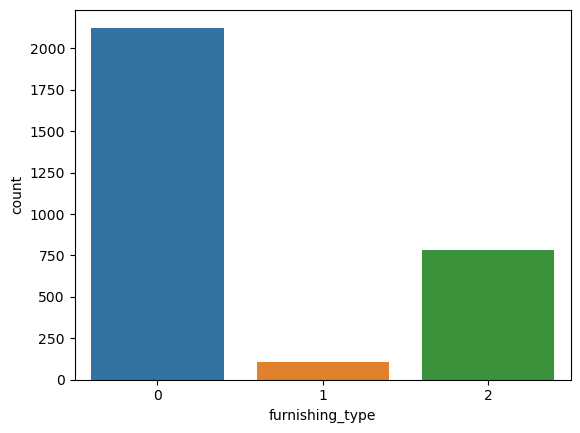

In [115]:
# furnishing type--
sns.countplot(df,x='furnishing_type')

* Most of the flats are unfurnished(70%). Very few are semi-furnished(3.5%) and around 26% flats are furnished

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='luxury_score', ylabel='price'>

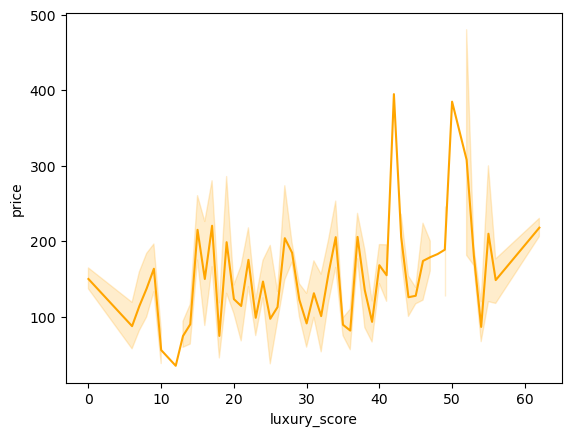

In [113]:
# luxury score
sns.lineplot(df,x='luxury_score',y='price',color='orange')

* Clearly, higher the luxury score, higher is the price

<Axes: xlabel='luxury_score', ylabel='price'>

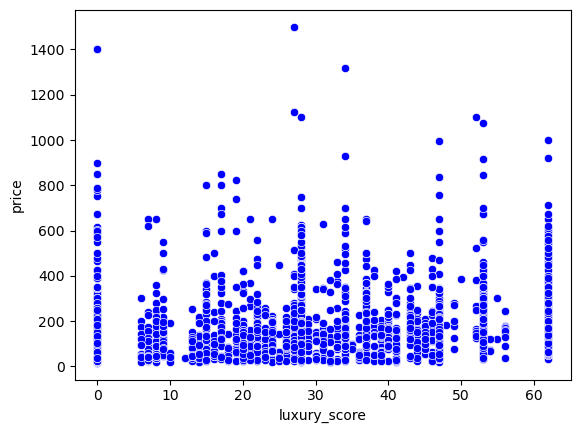

In [118]:
sns.scatterplot(df,x='luxury_score',y='price',color='blue')

<Axes: xlabel='luxury_score'>

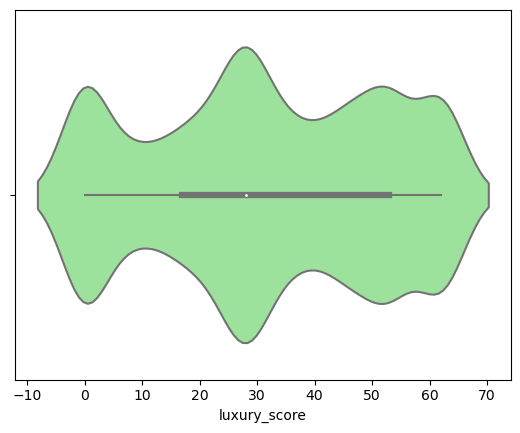

In [119]:
sns.violinplot(df,x='luxury_score',color='lightgreen')

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


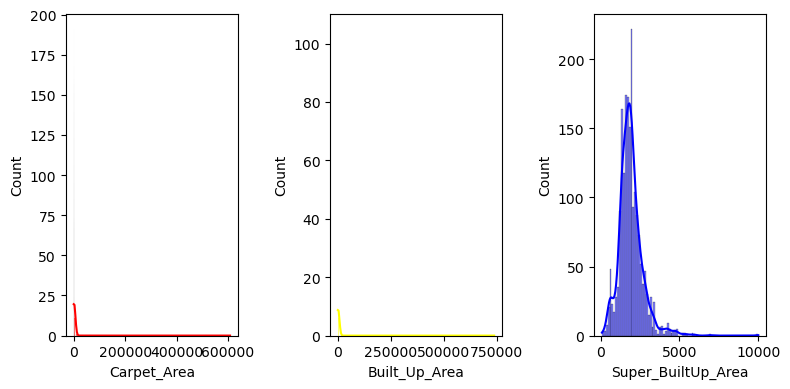

In [124]:
# areas
fig,axes=plt.subplots(1,3,figsize=(8,4))
sns.histplot(df,x='Carpet_Area',kde=True,color='red',ax=axes[0])
sns.histplot(df,x='Built_Up_Area',kde=True,color='yellow',ax=axes[1])
sns.histplot(df,x='Super_BuiltUp_Area',kde=True,color='blue',ax=axes[2])
plt.tight_layout()
plt.show()

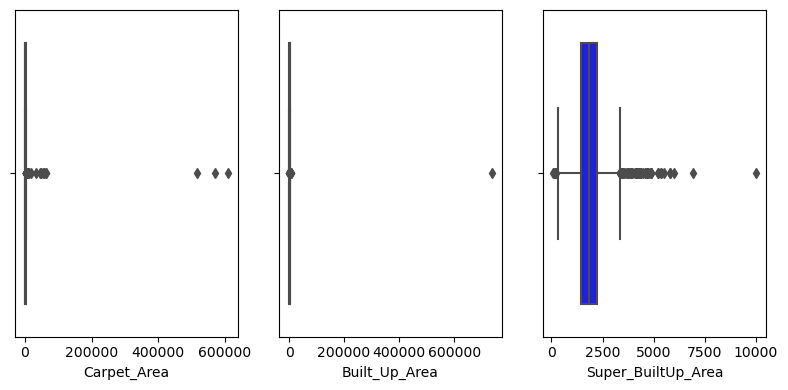

In [125]:
# areas
fig,axes=plt.subplots(1,3,figsize=(8,4))
sns.boxplot(df,x='Carpet_Area',color='red',ax=axes[0])
sns.boxplot(df,x='Built_Up_Area',color='yellow',ax=axes[1])
sns.boxplot(df,x='Super_BuiltUp_Area',color='blue',ax=axes[2])
plt.tight_layout()
plt.show()

In [129]:
print(df['Carpet_Area'].skew(),df['Built_Up_Area'].skew(),df['Super_BuiltUp_Area'].skew())

24.007072885138587 30.664328051860846 1.8053183595463531


* Clear Indication of outliers in area columns. Also, data is highly right skewed for Carpet and Built up area

<Axes: xlabel='Pooja_Room', ylabel='count'>

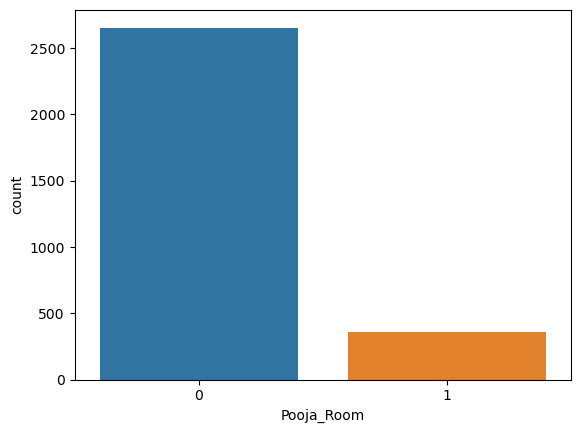

In [132]:
sns.countplot(df,x='Pooja_Room')

<Axes: xlabel='Store_Room', ylabel='count'>

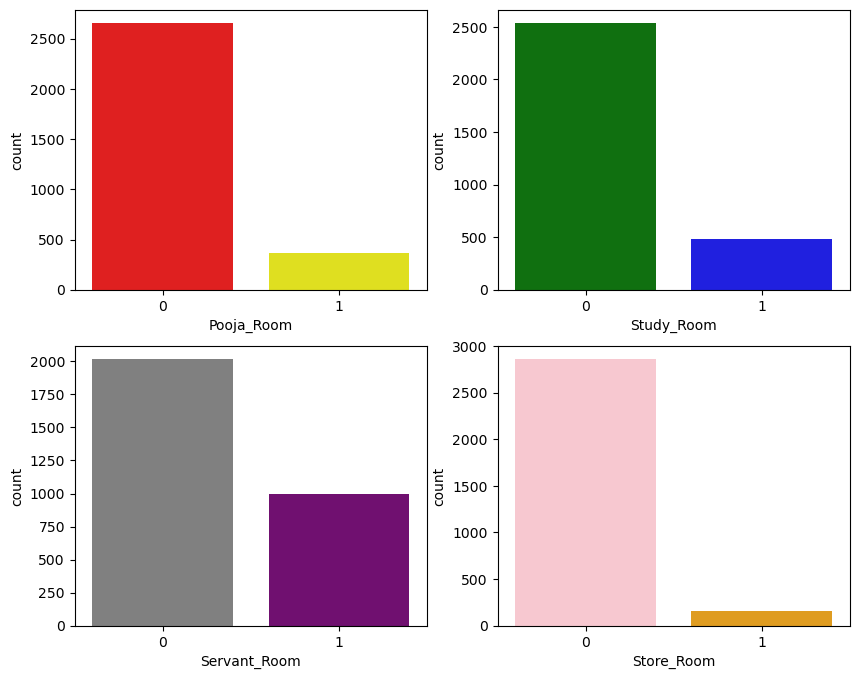

In [138]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
sns.countplot(df,x='Pooja_Room',ax=axes[0,0],palette=['red','yellow'])
sns.countplot(df,x='Study_Room',ax=axes[0,1],palette=['green','blue'])
sns.countplot(df,x='Servant_Room',ax=axes[1,0],palette=['grey','purple'])
sns.countplot(df,x='Store_Room',ax=axes[1,1],palette=['pink','orange'])

* Most of the flats do not have extra rooms 

<Axes: xlabel='bathroom', ylabel='count'>

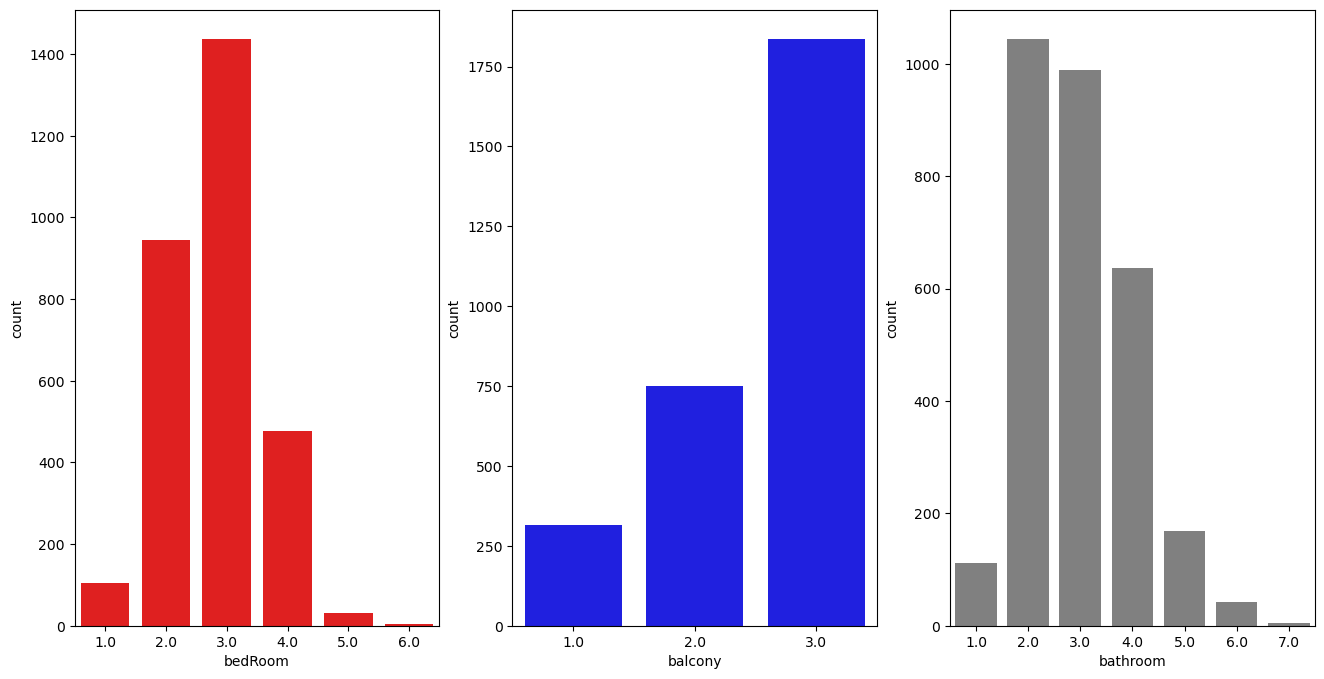

In [144]:
fig,axes=plt.subplots(1,3,figsize=(16,8))
sns.countplot(df,x='bedRoom',ax=axes[0],color='red')
sns.countplot(df,x='balcony',ax=axes[1],color='blue')
sns.countplot(df,x='bathroom',ax=axes[2],color='grey')

In [149]:
top_societies=df['society'].value_counts().reset_index().sort_values(by='count',ascending=False)
top_societies

,society,count
0,Tulip Violet,75
1,SS The Leaf,74
2,Shapoorji Pallonji Joyville Gurugram,45
3,Signature Global Park,36
4,Shree Vardhman Victoria,35
...,...,...
434,shree balaji appartment,1
435,Vasant Apartment,1
436,IRWO Westend Towers,1
437,The Center Court,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tulip Violet'),
  Text(1, 0, 'SS The Leaf'),
  Text(2, 0, 'Shapoorji Pallonji Joyville Gurugram'),
  Text(3, 0, 'Signature Global Park'),
  Text(4, 0, 'Shree Vardhman Victoria'),
  Text(5, 0, 'DLF New Town Heights '),
  Text(6, 0, 'Emaar MGF Emerald Floors Premier'),
  Text(7, 0, 'Smart World Gems'),
  Text(8, 0, 'Smart World Orchard'),
  Text(9, 0, 'Paras Dews')])

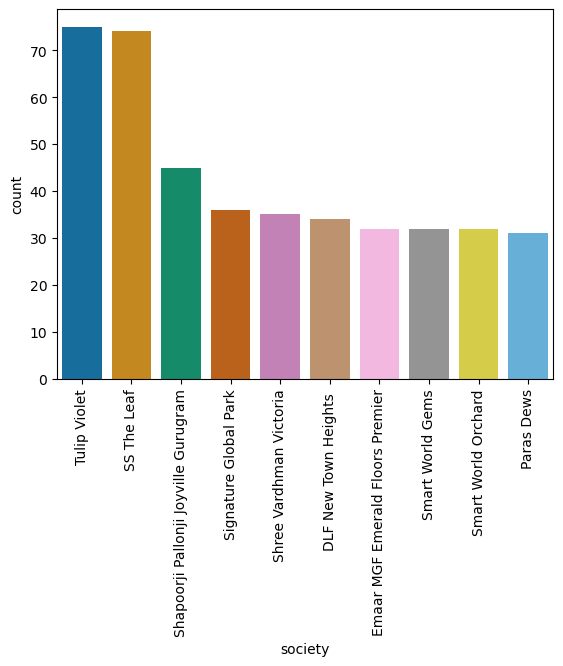

In [156]:
sns.barplot(top_societies.head(10),x='society',y='count',palette='colorblind')
plt.xticks(rotation=90)

In [155]:
top_locations=df['Location'].value_counts().reset_index().sort_values(by='count',ascending=False)
top_locations

,Location,count
0,Sohna,160
1,Sector 102 Gurgaon,113
2,Sector 85 Gurgaon,110
3,Sector 92 Gurgaon,100
4,Sector 69 Gurgaon,92
...,...,...
158,BPTP,1
159,Sector-7 Housing Board,1
160,C Block Sushant Lok Phase 1,1
161,Palam Vihar Extension,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' Sohna'),
  Text(1, 0, ' Sector 102 Gurgaon'),
  Text(2, 0, ' Sector 85 Gurgaon'),
  Text(3, 0, ' Sector 92 Gurgaon'),
  Text(4, 0, ' Sector 69 Gurgaon'),
  Text(5, 0, ' Sector 90 Gurgaon'),
  Text(6, 0, ' Sector 65 Gurgaon'),
  Text(7, 0, ' Sector 81 Gurgaon'),
  Text(8, 0, ' Sector 79 Gurgaon'),
  Text(9, 0, ' Sector 83 Gurgaon')])

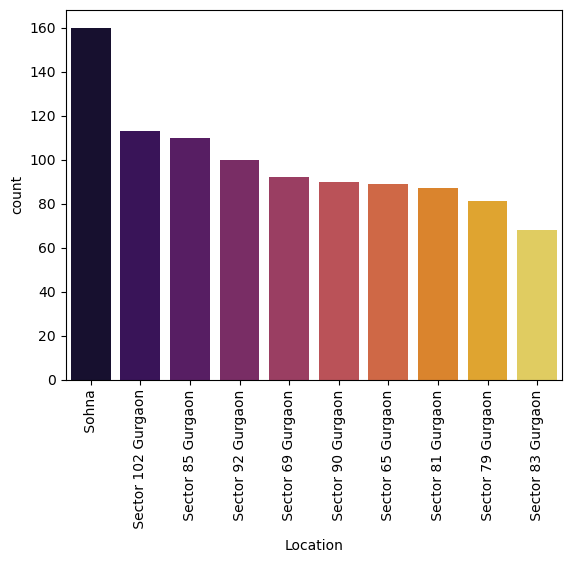

In [158]:
sns.barplot(top_locations.head(10),x='Location',y='count',palette='inferno')
plt.xticks(rotation=90)

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price'>

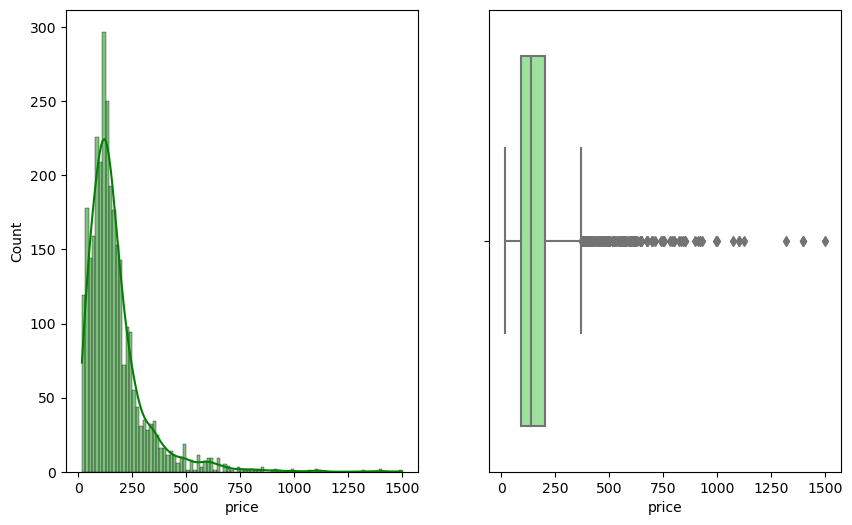

In [161]:
# price
fig,axes=plt.subplots(1,2,figsize=(10,6))
sns.histplot(df,x='price',color='green',ax=axes[0],kde=True)
sns.boxplot(df,x='price',color='lightgreen',ax=axes[1])

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft'>

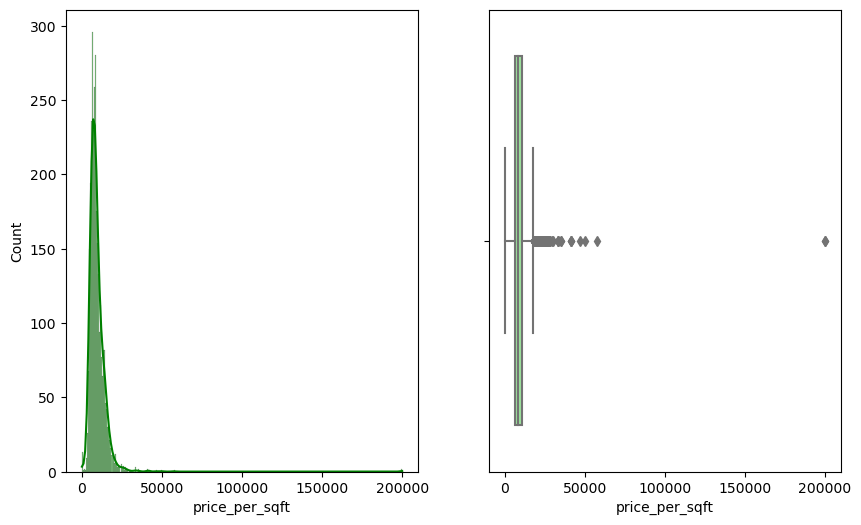

In [162]:
# price_per_sqft
fig,axes=plt.subplots(1,2,figsize=(10,6))
sns.histplot(df,x='price_per_sqft',color='green',ax=axes[0],kde=True)
sns.boxplot(df,x='price_per_sqft',color='lightgreen',ax=axes[1])

* Lots of outliers in these 2 columns

In [165]:
df[(df['price']>700) & (df['price_per_sqft']<30000)]

,society,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,BHK,...,TV,Microwave,Wardrobe,Fridge,AC,Modular Kitchen,Fan,Washing Machine,Water Purifier,furnishing_type
250,Tulip Monsella,825.0,28000.0,3.0,4.0,3.0,8.0,NaN,Under Construction,3.0,...,0,1,0,1,0,0,0,0,0,2
430,Central Park Resorts,1125.0,28266.0,4.0,5.0,3.0,2.0,North-West,Relatively New,4.0,...,0,0,1,0,0,0,0,0,0,2
446,Pioneer Urban Presidia,715.0,16486.0,4.0,5.0,3.0,7.0,East,Relatively New,4.0,...,0,0,7,0,0,0,0,0,0,2
674,Krrish Provence Estate,750.0,7500.0,5.0,6.0,3.0,23.0,North-East,Relatively New,5.0,...,0,0,0,0,0,0,0,0,0,0
952,Pioneer Araya,756.0,18000.0,4.0,4.0,3.0,23.0,West,Relatively New,4.0,...,0,0,5,0,0,0,0,0,0,2
1102,Paras Quartier,750.0,14018.0,4.0,4.0,3.0,20.0,North-East,New Property,4.0,...,0,1,4,0,0,0,0,0,0,2
1199,Pioneer Araya,1075.0,19500.0,5.0,7.0,3.0,10.0,North-East,Relatively New,5.0,...,0,0,0,0,0,0,0,0,0,0
1200,Pioneer Araya,914.0,19488.0,4.0,6.0,3.0,16.0,East,Relatively New,4.0,...,0,0,4,0,0,0,0,0,0,2
1201,Pioneer Araya,835.0,19513.0,4.0,6.0,3.0,16.0,East,Relatively New,4.0,...,0,0,0,0,0,0,0,0,0,0
1301,DLF The Belaire,1000.0,24557.0,4.0,5.0,3.0,17.0,North,Moderately Old,4.0,...,0,1,4,1,0,0,0,0,0,2
